# Лабораторная 3. Сверточная нейронная сеть

Задача - написать сверточную нейронную сеть для классификации набора данных MNIST (http://yann.lecun.com/exdb/mnist/). Файлы в формате idx не очень удобны, поэтому скачаем датасет с сайта https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz. Яном ЛеКаном была достигнута ошибка без предобучения и предобработки на его LeNet-5 на уровне 0.95%. Попробуем повторить.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
# import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

Скачаем датасет и посмотрим на его размеры. У нас 60 тысяч примеров в обучающей выборке и 10 тысяч в тестовой. Размер изображения 28x28 пикселей.

In [4]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [5]:
(x_train, y_train), (x_test, y_test) = load_data('3. mnist.npz')

indices_train = np.random.permutation(1024)
x_train = x_train[indices_train]
y_train = y_train[indices_train]

indices_train = np.random.permutation(1024)
x_test = x_test[indices_train]
y_test = y_test[indices_train]

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1024, 28, 28)
(1024,)
(1024, 28, 28)
(1024,)


In [7]:
unique, counts = np.unique(y_train, return_counts=True)
df = pd.DataFrame(counts, columns=["Counts"])
df

,Counts
0,100
1,120
2,101
3,95
4,108
5,92
6,95
7,122
8,90
9,101


# t-SNE

Визуализируем пространство нашей обучающей выборки с помощью алгоритма t-SNE, чтобы оценить разделимость классов

In [8]:
X_train = x_train.reshape(x_train.shape[0], 784)

In [9]:
embed=TSNE(n_components=2,perplexity=10,learning_rate=200, n_iter_without_progress=100)

In [10]:
X_embedded = embed.fit_transform(X_train)

In [11]:
print('Расхождение Кульбака-Лейблера после оптимизации: ', embed.kl_divergence_)

Расхождение Кульбака-Лейблера после оптимизации:  0.9516883492469788


In [12]:
fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1],
labels={"x": "Dimension 1","y": "Dimension 2",},
opacity=1, color=y_train.astype(str))
fig.update_layout(dict(plot_bgcolor = 'white'))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
showline=True, linewidth=1, linecolor='black')

fig.update_layout(title_text="t-SNE")
fig.update_traces(marker=dict(size=3))

fig.show()

NameError: name 'px' is not defined

In [ ]:
fig.write_html("tsne.html")

NameError: name 'fig' is not defined

# Le-Net 5

In [9]:
# X = np.random.randn(6000, 28, 28)
from nn.optimizers.adam import Adam
optimizer = Adam(learning_rate=0.001, beta1=0.9, beta2=0.999)


from nn.cnn import LeNet
from nn.losses.cross_entropy import CrossEntropy

arr = np.zeros((len(y_train), 10))
arr[np.arange(len(y_train)), y_train] = 1
labels_train = arr

arr = np.zeros((len(y_test), 10))
arr[np.arange(len(y_test)), y_test] = 1
labels_test = arr


model = LeNet(num_classes=10)

loss_fn = CrossEntropy()

print("Training LeNet with CrossEntropy loss...")
history = model.train(
    x_train[:, np.newaxis][:128], labels_train[:128],
    x_train[:, np.newaxis][:128], labels_train[:128],
    epochs=10,
    batch_size=32,
    optimizer=optimizer,
    loss_fn=loss_fn,
    verbose=True
)

print("Training completed!")
print(f"Final training loss: {history['train_loss'][-1]:.4f}")
if history['val_loss']:
    print(f"Final validation loss: {history['val_loss'][-1]:.4f}")
    print(f"Final validation accuracy: {history['val_accuracy'][-1]:.4f}")

Training LeNet with CrossEntropy loss...


100%|██████████| 4/4 [00:17<00:00,  4.41s/it]


Epoch 1/10 - loss: 28.7928 - val_loss: 24.9077 - val_accuracy: 0.2500


100%|██████████| 4/4 [00:17<00:00,  4.41s/it]


Epoch 2/10 - loss: 23.2053 - val_loss: 18.8511 - val_accuracy: 0.3984


100%|██████████| 4/4 [00:17<00:00,  4.46s/it]


Epoch 3/10 - loss: 17.0261 - val_loss: 14.5993 - val_accuracy: 0.5625


100%|██████████| 4/4 [00:16<00:00,  4.09s/it]


Epoch 4/10 - loss: 14.4490 - val_loss: 11.2480 - val_accuracy: 0.6328


100%|██████████| 4/4 [00:16<00:00,  4.09s/it]


Epoch 5/10 - loss: 10.1672 - val_loss: 6.2716 - val_accuracy: 0.7891


100%|██████████| 4/4 [00:16<00:00,  4.12s/it]


Epoch 6/10 - loss: 6.3709 - val_loss: 5.9227 - val_accuracy: 0.7969


100%|██████████| 4/4 [00:19<00:00,  4.99s/it]


Epoch 7/10 - loss: 5.7455 - val_loss: 4.0832 - val_accuracy: 0.8203


100%|██████████| 4/4 [00:16<00:00,  4.21s/it]


Epoch 8/10 - loss: 3.2108 - val_loss: 1.9854 - val_accuracy: 0.9375


100%|██████████| 4/4 [00:16<00:00,  4.02s/it]


Epoch 9/10 - loss: 1.9033 - val_loss: 1.2909 - val_accuracy: 0.9375


100%|██████████| 4/4 [00:16<00:00,  4.03s/it]


Epoch 10/10 - loss: 0.9005 - val_loss: 0.6815 - val_accuracy: 0.9609
Training completed!
Final training loss: 0.9005
Final validation loss: 0.6815
Final validation accuracy: 0.9609


[]

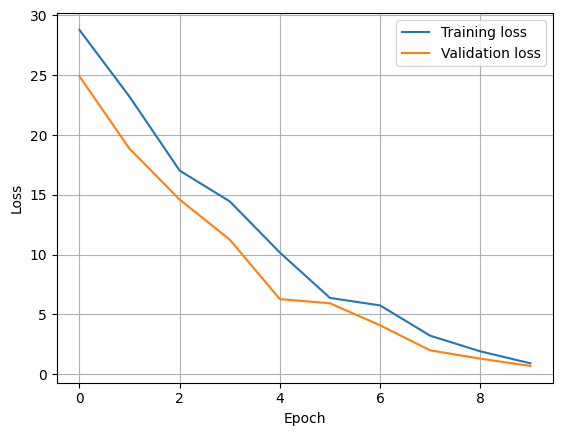

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(len(history["train_loss"])), history["train_loss"])
plt.plot(range(len(history["val_loss"])), history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.grid()
plt.plot()

[]

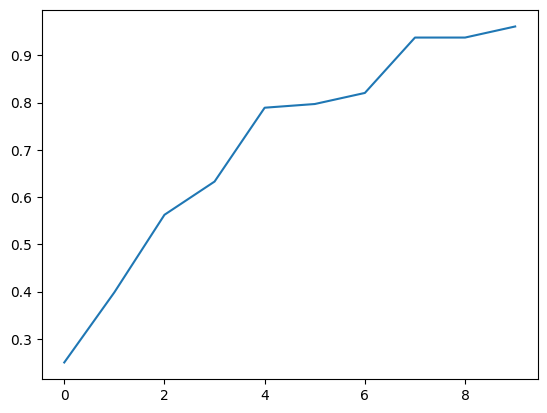

In [13]:
plt.plot(range(len(history["val_accuracy"])), history["val_accuracy"])
plt.plot()

In [14]:
from sklearn.metrics import confusion_matrix

predictions = model.forward(x_train[:, np.newaxis][:128])

<Axes: >

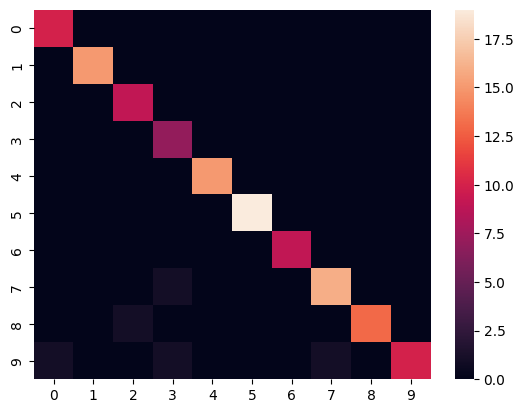

In [17]:
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)

sns.heatmap(confusion_matrix(y_train[:128], y_pred))

# MLP

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import math
plt.rcParams["figure.figsize"] = (20,6)
rng = np.random.default_rng(51)

In [4]:
import pandas as pd

dfm=pd.read_csv('2. Mushroom_dataset', delimiter = ",", names=['class-label','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
dfm

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


# Описательная статистика

Посмотрим на соотношение классов в наборе данных, чтобы оценить сбалансированность выборки

In [5]:
dfm['class-label'].value_counts()

class-label
EDIBLE       4488
POISONOUS    3928
Name: count, dtype: int64

На сей раз в описательной статистике есть почти все что надо: количество (count), мощность (unique), мода (top) и частота моды (freq). Не хватает только процента пропущенных значений.

In [6]:
dfm.describe()

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


In [7]:
dfm = dfm.drop(columns=["veil-type"])

le = preprocessing.LabelEncoder()
for column_name in dfm.columns:
    dfm[column_name]=le.fit_transform(dfm[column_name])
Y=dfm.iloc[:, 0:1].values.ravel()
X=dfm.iloc[:, 1:23]

# Подготовка датасета

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Инициализация модели и обучение

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [18]:
from nn import MLP, Adam, MSE

model = MLP([21, 10, 18, 2])
optimizer = Adam(learning_rate=1e-3)
loss_fn = MSE()  # Or CrossEntropy with one-hot targets

history = model.train(
    X_train.to_numpy(), y_train,
    X_test.to_numpy(), y_test,
    epochs=200, batch_size=16,
    learning_rate=1e-3,
    loss_fn=loss_fn,
    optimizer=optimizer,
    verbose=True
)

Epoch 1/200 - loss: 4.0935 - val_loss: 265.5155 - val_accuracy: 0.7972
Epoch 2/200 - loss: 1.3628 - val_loss: 173.9603 - val_accuracy: 0.8297
Epoch 3/200 - loss: 0.8991 - val_loss: 124.6878 - val_accuracy: 0.8804
Epoch 4/200 - loss: 0.7145 - val_loss: 104.1724 - val_accuracy: 0.8832
Epoch 5/200 - loss: 0.5895 - val_loss: 82.7806 - val_accuracy: 0.9050
Epoch 6/200 - loss: 0.4585 - val_loss: 62.2212 - val_accuracy: 0.9291
Epoch 7/200 - loss: 0.3423 - val_loss: 46.3175 - val_accuracy: 0.9568
Epoch 8/200 - loss: 0.2583 - val_loss: 34.2971 - val_accuracy: 0.9731
Epoch 9/200 - loss: 0.1967 - val_loss: 27.1396 - val_accuracy: 0.9786
Epoch 10/200 - loss: 0.1593 - val_loss: 22.5531 - val_accuracy: 0.9814
Epoch 11/200 - loss: 0.1346 - val_loss: 19.8161 - val_accuracy: 0.9869
Epoch 12/200 - loss: 0.1176 - val_loss: 17.4951 - val_accuracy: 0.9877
Epoch 13/200 - loss: 0.1027 - val_loss: 16.2202 - val_accuracy: 0.9893
Epoch 14/200 - loss: 0.0915 - val_loss: 14.6272 - val_accuracy: 0.9893
Epoch 15/20

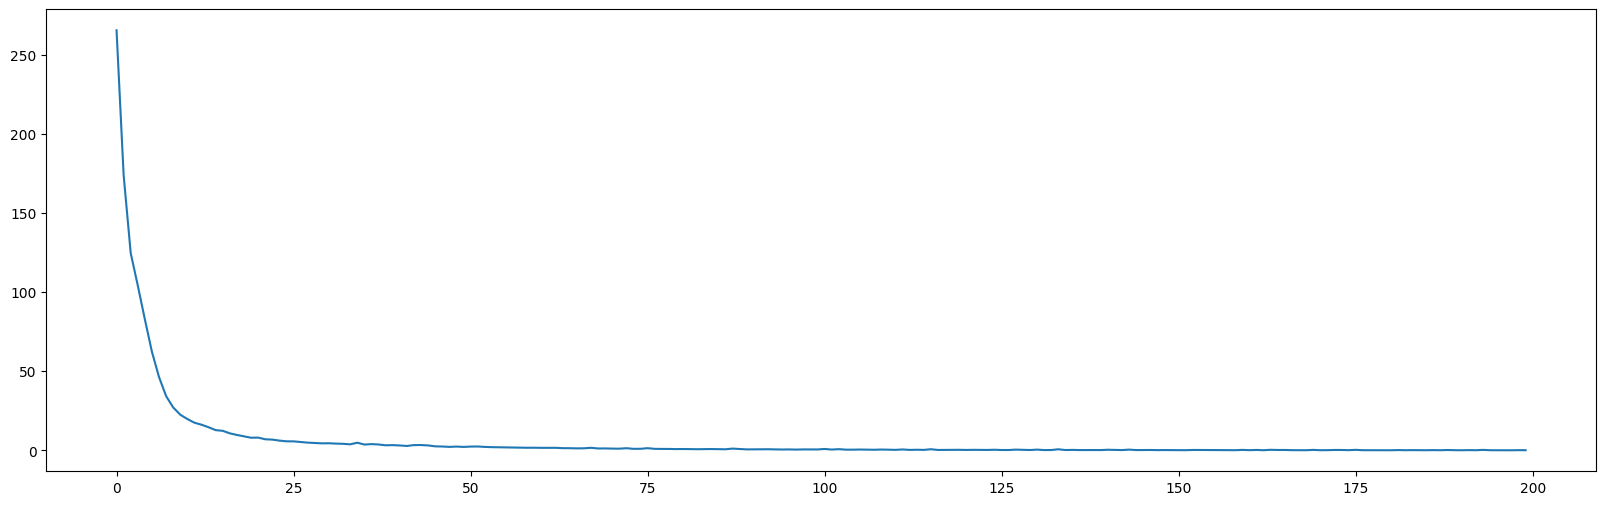

In [20]:
plt.plot(history["val_loss"])